In [1]:
#import pandas library for creating dataframe
import pandas as pd

In [2]:
#create dataframe
ebay_df = pd.read_csv("C:/Users/sourav singh/Downloads/eBayiPadTrain.csv")

In [3]:
#data overview
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 11 columns):
description    790 non-null object
biddable       1861 non-null int64
startprice     1861 non-null float64
condition      1861 non-null object
cellular       1861 non-null object
carrier        1861 non-null object
color          1861 non-null object
storage        1861 non-null object
productline    1861 non-null object
sold           1861 non-null int64
UniqueID       1861 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 160.0+ KB


In [4]:
#check if dataset consist of any null value
ebay_df.isnull().sum()

description    1071
biddable          0
startprice        0
condition         0
cellular          0
carrier           0
color             0
storage           0
productline       0
sold              0
UniqueID          0
dtype: int64

# Model is created by removing uniqueId field

In [5]:
model_wo_desc_x = ebay_df.drop(['UniqueID'],axis = 1)
model_wo_desc_x

,description,biddable,startprice,condition,cellular,carrier,color,storage,productline,sold
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,Used,0,None,Black,16,iPad 2,0
1,"Previously used, please read description. May ...",1,0.99,Used,1,Verizon,Unknown,16,iPad 2,1
2,NaN,0,199.99,Used,0,None,White,16,iPad 4,1
3,NaN,0,235.00,New other (see details),0,None,Unknown,16,iPad mini 2,0
4,Please feel free to buy. All products have bee...,0,199.99,Seller refurbished,Unknown,Unknown,Unknown,Unknown,Unknown,0
5,NaN,1,175.00,Used,1,AT&T,Space Gray,32,iPad mini 2,1
6,NaN,1,100.00,New,0,None,Space Gray,16,iPad mini,1
7,NaN,0,329.99,New,0,None,White,16,iPad mini 3,0
8,NaN,1,0.99,Used,1,Unknown,White,64,iPad 1,1
9,NaN,1,150.00,Used,0,None,White,32,iPad 4,1


### plot a graph to see how target data is distributed 

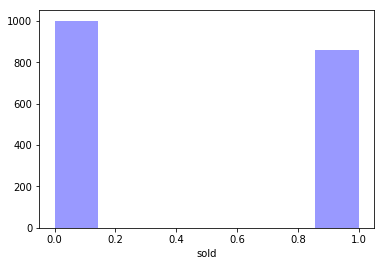

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(model_wo_desc_x['sold'], kde=False,hist = True, color='blue')

In [7]:
model_wo_desc_x['sold'].value_counts()

0    1001
1     860
Name: sold, dtype: int64

#### converting every column of dataframe into one-hot encoding and at the same time renaming column "Unkown" with meaning full column name 

In [8]:
encod_condition = pd.get_dummies(model_wo_desc_x.condition)
encod_carrier = pd.get_dummies(model_wo_desc_x.carrier)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_condition, encod_carrier], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_carrier'},inplace=True)

In [9]:
encod_color = pd.get_dummies(model_wo_desc_x.color)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_color], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_color'},inplace=True)

In [10]:
encod_storage = pd.get_dummies(model_wo_desc_x.storage)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_storage], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_storage'},inplace=True)

In [11]:
encod_productline = pd.get_dummies(model_wo_desc_x.productline)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_productline], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_productline'},inplace=True)

In [12]:
encod_cellular = pd.get_dummies(model_wo_desc_x.cellular)
encod_cellular.rename(columns={'0':'Celluar_notEnabled','1':'Cellular_enabled','Unknown':'Unknown_cellular'},inplace=True)
model_wo_desc_x = pd.concat([model_wo_desc_x, encod_cellular], axis=1)
model_wo_desc_x.rename(columns={'Unknown':'Unknown_cellular'},inplace=True)

### removing coulmns : condition,cellular,carrier,color, storage , productline

In [13]:
model_wo_desc_x.isnull().sum()

description                 1071
biddable                       0
startprice                     0
condition                      0
cellular                       0
carrier                        0
color                          0
storage                        0
productline                    0
sold                           0
For parts or not working       0
Manufacturer refurbished       0
New                            0
New other (see details)        0
Seller refurbished             0
Used                           0
AT&T                           0
None                           0
Other                          0
Sprint                         0
T-Mobile                       0
Unknown_carrier                0
Verizon                        0
Black                          0
Gold                           0
Space Gray                     0
Unknown_color                  0
White                          0
128                            0
16                             0
32        

In [14]:
# model_wo_desc_x['sold'].value_counts()
df_NAN = model_wo_desc_x[   model_wo_desc_x['description'].isna() ]
df_NAN['sold'].value_counts()

0    555
1    516
Name: sold, dtype: int64

In [15]:
model_wo_desc_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 48 columns):
description                 790 non-null object
biddable                    1861 non-null int64
startprice                  1861 non-null float64
condition                   1861 non-null object
cellular                    1861 non-null object
carrier                     1861 non-null object
color                       1861 non-null object
storage                     1861 non-null object
productline                 1861 non-null object
sold                        1861 non-null int64
For parts or not working    1861 non-null uint8
Manufacturer refurbished    1861 non-null uint8
New                         1861 non-null uint8
New other (see details)     1861 non-null uint8
Seller refurbished          1861 non-null uint8
Used                        1861 non-null uint8
AT&T                        1861 non-null uint8
None                        1861 non-null uint8
Other                

In [16]:
model_wo_desc_x_OHE = model_wo_desc_x.drop(['condition','cellular','carrier','color','storage','productline'],axis=1)
model_wo_desc_x_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 42 columns):
description                 790 non-null object
biddable                    1861 non-null int64
startprice                  1861 non-null float64
sold                        1861 non-null int64
For parts or not working    1861 non-null uint8
Manufacturer refurbished    1861 non-null uint8
New                         1861 non-null uint8
New other (see details)     1861 non-null uint8
Seller refurbished          1861 non-null uint8
Used                        1861 non-null uint8
AT&T                        1861 non-null uint8
None                        1861 non-null uint8
Other                       1861 non-null uint8
Sprint                      1861 non-null uint8
T-Mobile                    1861 non-null uint8
Unknown_carrier             1861 non-null uint8
Verizon                     1861 non-null uint8
Black                       1861 non-null uint8
Gold                       

### fill all NAN in DESC column with nill

In [17]:
model_wo_desc_x_OHE['description'].fillna('Neutal',inplace=True)


In [18]:
model_wo_desc_x_OHE.head()

,description,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,...,iPad 5,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,"Previously used, please read description. May ...",1,0.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,Neutal,0,199.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,Neutal,0,235.00,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,Please feel free to buy. All products have bee...,0,199.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
print(model_wo_desc_x_OHE['description'].isna().sum().sum())
print(model_wo_desc_x_OHE['description'].count())

0
1861


In [20]:
# library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
#nltk.download('stopwords') 
  
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
  
# Initialize empty array to append clean text 
corpus = []  
  
# 1000 (reviews) rows to clean 
for i in range(0, 1861):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', model_wo_desc_x_OHE['description'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)

In [21]:
review

'day warranti fulli function engrav ipad st gener sign normal wear'

In [22]:
model_wo_desc_x_OHE['new_Phrase']=corpus
model_wo_desc_x_OHE.head(15)

,description,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,...,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular,new_Phrase
0,iPad is in 8.5+ out of 10 cosmetic condition!,0,159.99,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,ipad cosmet condit
1,"Previously used, please read description. May ...",1,0.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,previous use pleas read descript may show sign...
2,Neutal,0,199.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,neutal
3,Neutal,0,235.00,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,neutal
4,Please feel free to buy. All products have bee...,0,199.99,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,pleas feel free buy product thoroughli inspect...
5,Neutal,1,175.00,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,neutal
6,Neutal,1,100.00,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,neutal
7,Neutal,0,329.99,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,neutal
8,Neutal,1,0.99,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,neutal
9,Neutal,1,150.00,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,neutal


### remove the desc column

In [23]:
model_wo_desc_x_OHE.drop(['description'],axis=1,inplace=True)

In [24]:
model_wo_desc_x_OHE

,biddable,startprice,sold,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,...,iPad Air,iPad Air 2,iPad mini,iPad mini 2,iPad mini 3,iPad mini Retina,Celluar_notEnabled,Cellular_enabled,Unknown_cellular,new_Phrase
0,0,159.99,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,ipad cosmet condit
1,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,previous use pleas read descript may show sign...
2,0,199.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,neutal
3,0,235.00,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,neutal
4,0,199.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,pleas feel free buy product thoroughli inspect...
5,1,175.00,1,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,neutal
6,1,100.00,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,neutal
7,0,329.99,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,neutal
8,1,0.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,neutal
9,1,150.00,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,neutal


In [25]:
model_wo_desc_x_OHE_Y = model_wo_desc_x_OHE["sold"]
model_wo_desc_x_OHE_X = model_wo_desc_x_OHE.drop("sold", axis=1)

In [26]:
# Creating the Bag of Words 
# model now here some steps to count every word 
from sklearn.feature_extraction.text import CountVectorizer 
bag=model_wo_desc_x_OHE_X['new_Phrase']
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)
vector = vectorizer.fit_transform(bag)

#creating BOG dictonary
#print(vectorizer.vocabulary_)

bag_words = vector.toarray()

#list of all features name
#print(vectorizer.get_feature_names()) 


In [27]:
bag_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
bag_df = pd.DataFrame(bag_words)
bag_df

,0,1,2,3,4,5,6,7,8,9,...,684,685,686,687,688,689,690,691,692,693
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_desc_final = pd.concat([model_wo_desc_x_OHE_X, bag_df], axis=1)
X_desc_final.drop(['new_Phrase'],axis=1,inplace = True)
X_desc_final

,biddable,startprice,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,None,...,684,685,686,687,688,689,690,691,692,693
0,0,159.99,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,199.99,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,235.00,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,199.99,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,175.00,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,100.00,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,329.99,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,150.00,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
for col in X_desc_final.columns: 
    print(col)

biddable
startprice
For parts or not working
Manufacturer refurbished
New
New other (see details)
Seller refurbished
Used
AT&T
None
Other
Sprint
T-Mobile
Unknown_carrier
Verizon
Black
Gold
Space Gray
Unknown_color
White
128
16
32
64
Unknown_storage
Unknown_productline
iPad 1
iPad 2
iPad 3
iPad 4
iPad 5
iPad Air
iPad Air 2
iPad mini
iPad mini 2
iPad mini 3
iPad mini Retina
Celluar_notEnabled
Cellular_enabled
Unknown_cellular
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
17

In [31]:
model_wo_desc_x_OHE_Y

0       0
1       1
2       1
3       0
4       0
5       1
6       1
7       0
8       1
9       1
10      1
11      0
12      1
13      1
14      1
15      0
16      1
17      0
18      1
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      1
27      0
28      0
29      1
       ..
1831    0
1832    0
1833    0
1834    0
1835    0
1836    0
1837    0
1838    1
1839    1
1840    0
1841    0
1842    0
1843    0
1844    0
1845    0
1846    0
1847    0
1848    0
1849    1
1850    0
1851    1
1852    0
1853    0
1854    1
1855    0
1856    1
1857    0
1858    0
1859    1
1860    0
Name: sold, Length: 1861, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train_desc, X_test_desc, y_train_desc, y_test_desc = train_test_split(X_desc_final, model_wo_desc_x_OHE_Y, test_size = 0.20,random_state=50) 

## Random Forest with description

In [48]:
from sklearn.ensemble import RandomForestClassifier 
 
model_rfc = RandomForestClassifier(n_estimators = 501,criterion = 'entropy')
model_rfc.fit(X_train_desc,y_train_desc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=501, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
model_rfc.score(X_test_desc, y_test_desc)

0.806970509383378

## Decision Tree with description

In [50]:
from sklearn.tree import DecisionTreeClassifier
decTree_desc = DecisionTreeClassifier()
decTree_desc.fit(X_train_desc,y_train_desc)
decTree_desc.score(X_test_desc, y_test_desc)

0.7587131367292225

## Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression 
logreg_desc = LogisticRegression()
logreg_desc.fit(X_train_desc,y_train_desc)
logreg_desc.score(X_test_desc, y_test_desc)

C:\Users\sourav singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8096514745308311

In [52]:
# list of text documents
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer1 = TfidfVectorizer()
# tokenize and build vocab
vectorizer1.fit(bag)
# summarize
print(vectorizer1.vocabulary_)
print(vectorizer1.idf_)
# encode document
vector1 = vectorizer.transform(bag)
# summarize encoded vector
print(vector1.shape)
print(vector1.toarray())
bow_tfidf = vector1.toarray()

{'ipad': 307, 'cosmet': 135, 'condit': 117, 'previous': 470, 'use': 655, 'pleas': 456, 'read': 489, 'descript': 162, 'may': 366, 'show': 552, 'sign': 559, 'scratch': 529, 'screen': 531, 'neutal': 398, 'feel': 217, 'free': 234, 'buy': 84, 'product': 474, 'thoroughli': 623, 'inspect': 297, 'clean': 106, 'test': 618, 'good': 254, 'minor': 380, 'wear': 671, 'tear': 615, 'bodi': 68, 'light': 334, 'function': 239, 'great': 258, 'icloud': 283, 'lock': 346, 'imei': 287, 'tablet': 611, 'fulli': 238, 'work': 683, 'new': 400, 'digit': 166, 'instal': 298, 'back': 44, 'small': 570, 'dent': 157, 'top': 629, 'right': 519, 'bottom': 71, 'left': 327, 'corner': 132, 'surfac': 605, 'pictur': 449, 'sell': 539, 'qualiti': 482, 'appl': 32, 'certifi': 97, 'technician': 616, 'crack': 138, 'consist': 123, 'typic': 637, 'esn': 193, 'mini': 377, 'open': 417, 'box': 74, 'item': 310, 'includ': 293, 'origin': 420, 'genuin': 246, 'normal': 406, 'custom': 140, 'carrier': 93, 'return': 517, 'come': 113, 'usb': 654, 'c

In [53]:
bag_df_tfidf = pd.DataFrame(bow_tfidf)
bag_df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,684,685,686,687,688,689,690,691,692,693
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X_desc_final_tiidf = pd.concat([model_wo_desc_x_OHE_X, bag_df_tfidf], axis=1)
X_desc_final_tiidf.drop(['new_Phrase'],axis=1,inplace = True)
# for col in X_desc_final_tiidf.columns: 
#     print(col)
X_desc_final_tiidf

,biddable,startprice,For parts or not working,Manufacturer refurbished,New,New other (see details),Seller refurbished,Used,AT&T,None,...,684,685,686,687,688,689,690,691,692,693
0,0,159.99,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,199.99,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,235.00,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,199.99,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,175.00,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,100.00,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,329.99,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0.99,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,150.00,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split
X_train_desc_tiidf, X_test_desc_tiidf, y_train_desc_tiidf, y_test_desc_tiidf = train_test_split(X_desc_final_tiidf, model_wo_desc_x_OHE_Y, test_size = 0.20) 

In [56]:
from sklearn.ensemble import RandomForestClassifier 
 
model_rfc_tiidf = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',max_depth = 70)
model_rfc_tiidf.fit(X_train_desc_tiidf,y_train_desc_tiidf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
model_rfc_tiidf.score(X_test_desc_tiidf, y_test_desc_tiidf)

0.8150134048257373

In [58]:
from sklearn.linear_model import LogisticRegression 
logreg_desc_tiidf = LogisticRegression()
logreg_desc_tiidf.fit(X_train_desc_tiidf,y_train_desc_tiidf)
logreg_desc_tiidf.score(X_test_desc_tiidf, y_test_desc_tiidf)

C:\Users\sourav singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.774798927613941

In [59]:
from sklearn.tree import DecisionTreeClassifier
decTree_desc_tiidf = DecisionTreeClassifier()
decTree_desc_tiidf.fit(X_train_desc_tiidf,y_train_desc_tiidf)
decTree_desc_tiidf.score(X_test_desc_tiidf, y_test_desc_tiidf)

0.7479892761394102